In [1]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
from read_data import *
%matplotlib inline

### We will use two functions imported from read_data: get_fn_list() and build_tables().
### Build tables takes a filename to one an output file from a simulation and turns it into an astropy table.
### If we want a list of filenames, we can use the function get_fn_list(), which takes as inputs the directory
### to the outputs folder, the number of the first file we want to read, and the number of the last file. It then
### returns a list of the correct filenames which we can then feed to build_table().

In [18]:
## list of data tables
full_data = []

HoR=1e-3
data_ngrid = [100,200,400,800]#,500,600,700,800]
prefs      = ['../outputs/tilt45_rmax1e4_new/n100/evolve_rmin60_rad_',
              '../outputs/tilt45_rmax1e4_new/n200/evolve_rmin60_rad_',
              '../outputs/tilt45_rmax1e4_new/n400/evolve_rmin60_rad_',
              '../outputs/tilt45_rmax1e4_new/n800/evolve_rmin60_rad_']


ngrid = 1000
tgrid = 1000

for i in range(len(data_ngrid)):
        full_data.append(build_data(prefs[i],ngrid,tgrid,data_ngrid[i],convert=True,HoR=HoR,order=1))

shape of tspace:  (1000,)
[  100.       104.7616   109.7499   114.9757   120.4504   126.1857
   132.1941   138.4886   145.0829   151.9911   159.2283   166.8101
   174.7528   183.0738   191.791    200.9233   210.4904   220.5131
   231.013    242.0128   253.5364   265.6088   278.2559   291.5053
   305.3856   319.9267   335.1603   351.1192   367.838    385.3529
   403.7017   422.9243   443.0621   464.1589   486.2602   509.4138
   533.6699   559.081    585.7021   613.5907   642.8073   673.4151
   705.4802   739.0722   774.2637   811.1308   849.7534   890.2151
   932.6033   977.01    1023.531   1072.267   1123.324   1176.812
  1232.847   1291.55    1353.048   1417.474   1484.968   1555.676
  1629.751   1707.353   1788.65    1873.817   1963.041   2056.512
  2154.435   2257.02    2364.489   2477.076   2595.024   2718.588
  2848.036   2983.647   3125.716   3274.549   3430.469   3593.814
  3764.936   3944.206   4132.012   4328.761   4534.879   4750.81
  4977.024   5214.008   5462.277   5722.368

shape of tspace:  (1000,)
[  100.       101.1609   102.3352   103.5232   104.7249   105.9407
   107.1705   108.4146   109.6731   110.9463   112.2342   113.5371
   114.8551   116.1884   117.5372   118.9017   120.282    121.6783
   123.0908   124.5197   125.9652   127.4275   128.9068   130.4032
   131.917    133.4484   134.9975   136.5647   138.15     139.7537
   141.3761   143.0173   144.6775   146.357    148.056    149.7747
   151.5134   153.2723   155.0516   156.8515   158.6723   160.5143
   162.3777   164.2627   166.1695   168.0985   170.0499   172.024
   174.0209   176.0411   178.0847   180.152    182.2433   184.3589
   186.4991   188.6641   190.8542   193.0698   195.3111   197.5783
   199.872    202.1922   204.5394   206.9138   209.3158   211.7457
   214.2037   216.6904   219.2058   221.7505   224.3248   226.9289
   229.5632   232.2281   234.924    237.6511   240.4099   243.2008
   246.024    248.88     251.7691   254.6918   257.6485   260.6394
   263.6651   266.7259   269.8222   2

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


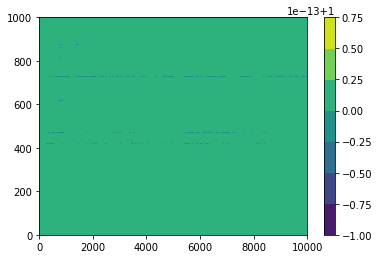

In [9]:
# should be 1 everywhere; verifies that the conversion from code to physical coordinates was done correctly

plt.contourf(full_data["t"][:,:]/full_data["T"][:,:])
plt.colorbar()

In [4]:
## check for mass conservation

init_mass = np.sum(full_data["sigma"][:,1]*2.*np.pi*full_data["r"][:,1]*full_data["dr"][:,1])
for i in range(tgrid):
    print ( np.sum(full_data["sigma"][:,i]*2.*np.pi*full_data["r"][:,i]*full_data["dr"][:,i]) - init_mass)/init_mass

TypeError: list indices must be integers, not str

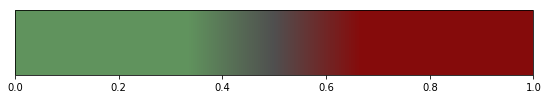

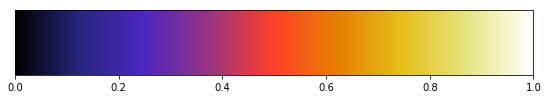

In [4]:
# construct custom colormap for Bernoulli number
from matplotlib.colors import LinearSegmentedColormap
from colour import Color

c3 = '#850B0B'
c2 = '#4F4F4F'
c1 = '#60935D'
clist =  list(Color(c1).range_to(Color(c1),4))[:-1]
clist += list(Color(c2).range_to(Color(c2),2))[:-1]
clist += list(Color(c3).range_to(Color(c3),4))[:-1]

for k in range(len(clist)):
    clist[k] = str(clist[k])
cm = LinearSegmentedColormap.from_list('my_cmap', clist, N=256)

## compare to CMRmap

# our cmap
a = np.array([[0,1]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=cm)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)
plt.show()

# cmr map
a = np.array([[0,1]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=plt.get_cmap("CMRmap"))
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)

500001900.0
500011100.0
500002300.0
500000200.0


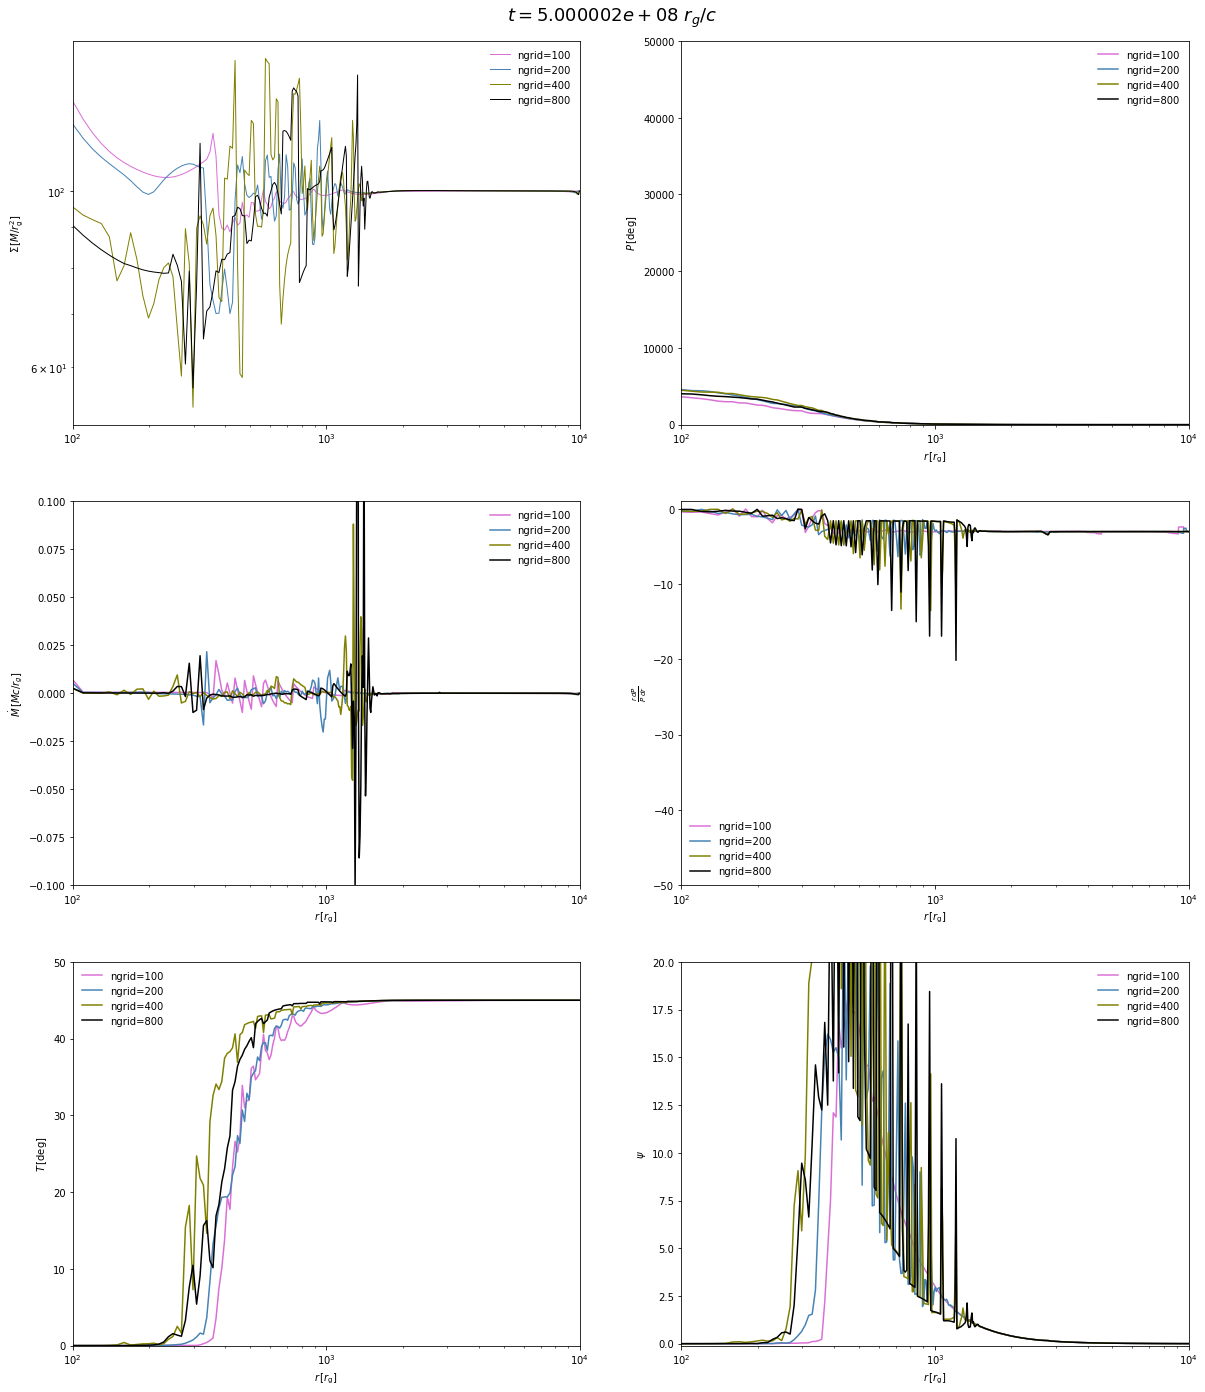

In [19]:
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_interface_multi(table_list,ind):
    colors     = ['orchid','steelblue','olive','black']
    labels     = ['ngrid=100','ngrid=200','ngrid=400','ngrid=800']
    fig, ax = plt.subplots(3,2,figsize=(20,24))
    for i,table in enumerate(table_list):
        plot_r = table["r"][:,ind]
        plot_d = table["sigma"][:,ind]
        plot_t = table["tilt"][:,ind]
        plot_s = table["s"][:,ind]
        plot_p = table["prec"][:,ind]
        plot_rdpdr = table["rdpdr"][:,ind]/plot_p
        plot_psi  = table["psi"][:,ind]
        plot_mdot  = table["mdot"][:,ind]

        time = np.average(table["t"][:,ind])

        rmin = np.min(plot_r)
        rmax = np.max(plot_r)

        ax[0][0].plot(plot_r,plot_d,color=colors[i],label=labels[i],lw=1)
        ax[0][0].set_ylabel(r'$\Sigma\,[M/r_{\rm g}^2]$')
        ax[0][0].set_xlim(rmin,rmax)
        #ax[0][0].set_ylim(0,8e4)
        ax[0][0].set_xscale('log')
        ax[0][0].set_yscale('log')
        ax[0][0].legend(frameon=False)
        
        ax[1][0].plot(plot_r,plot_mdot,color=colors[i],label=labels[i])
        ax[1][0].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][0].set_ylabel(r'$\dot{M}\,[Mc/r_g]$')
        ax[1][0].set_ylim(-1e-1,1e-1)
        ax[1][0].set_xlim(rmin,rmax)
        ax[1][0].set_xscale('log')
        ax[1][0].legend(frameon=False)

        ax[2][0].plot(plot_r,plot_t,color=colors[i],label=labels[i])
        ax[2][0].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[2][0].set_ylabel(r'$T\,[{\rm deg}]$')
        ax[2][0].set_ylim(0,50)
        ax[2][0].set_xlim(rmin,rmax)
        ax[2][0].set_xscale('log')
        ax[2][0].legend(frameon=False)

        ax[0][1].plot(plot_r,plot_p,color=colors[i],label=labels[i])
        ax[0][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[0][1].set_ylabel(r'$P\,[{\rm deg}]$')
        ax[0][1].set_ylim(0,50000)
        ax[0][1].set_xlim(rmin,rmax)
        ax[0][1].set_xscale('log')
        ax[0][1].legend(frameon=False)
        #ax[0][1].set_yscale('log')

        ax[1][1].plot(plot_r,plot_rdpdr,color=colors[i],label=labels[i])
        ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][1].set_ylabel(r'$\frac{r}{P}\frac{dP}{dr}$')
        ax[1][1].set_ylim(-50,1)
        ax[1][1].set_xlim(rmin,rmax)
        ax[1][1].set_xscale('log')
        ax[1][1].legend(frameon=False)

        ax[2][1].plot(plot_r,plot_psi,color=colors[i],label=labels[i])
        ax[2][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[2][1].set_ylabel(r'$\psi$')
        ax[2][1].set_ylim(-0.1,20)
        ax[2][1].set_xlim(rmin,rmax)
        ax[2][1].set_xscale('log')
        ax[2][1].legend(frameon=False)
        print time

    #title = "t = %s"
    fig.suptitle(r"$t = %e \,\,r_g/c$" % time,x=0.5,y=0.9,fontsize=18)#,pad=20)
    
    return fig
#fig = plot_interface(full_data,5000)
#plt.savefig('alignment_front_early.png')
#plt.show()
fig = plot_interface_multi(full_data,-1)
plt.show()

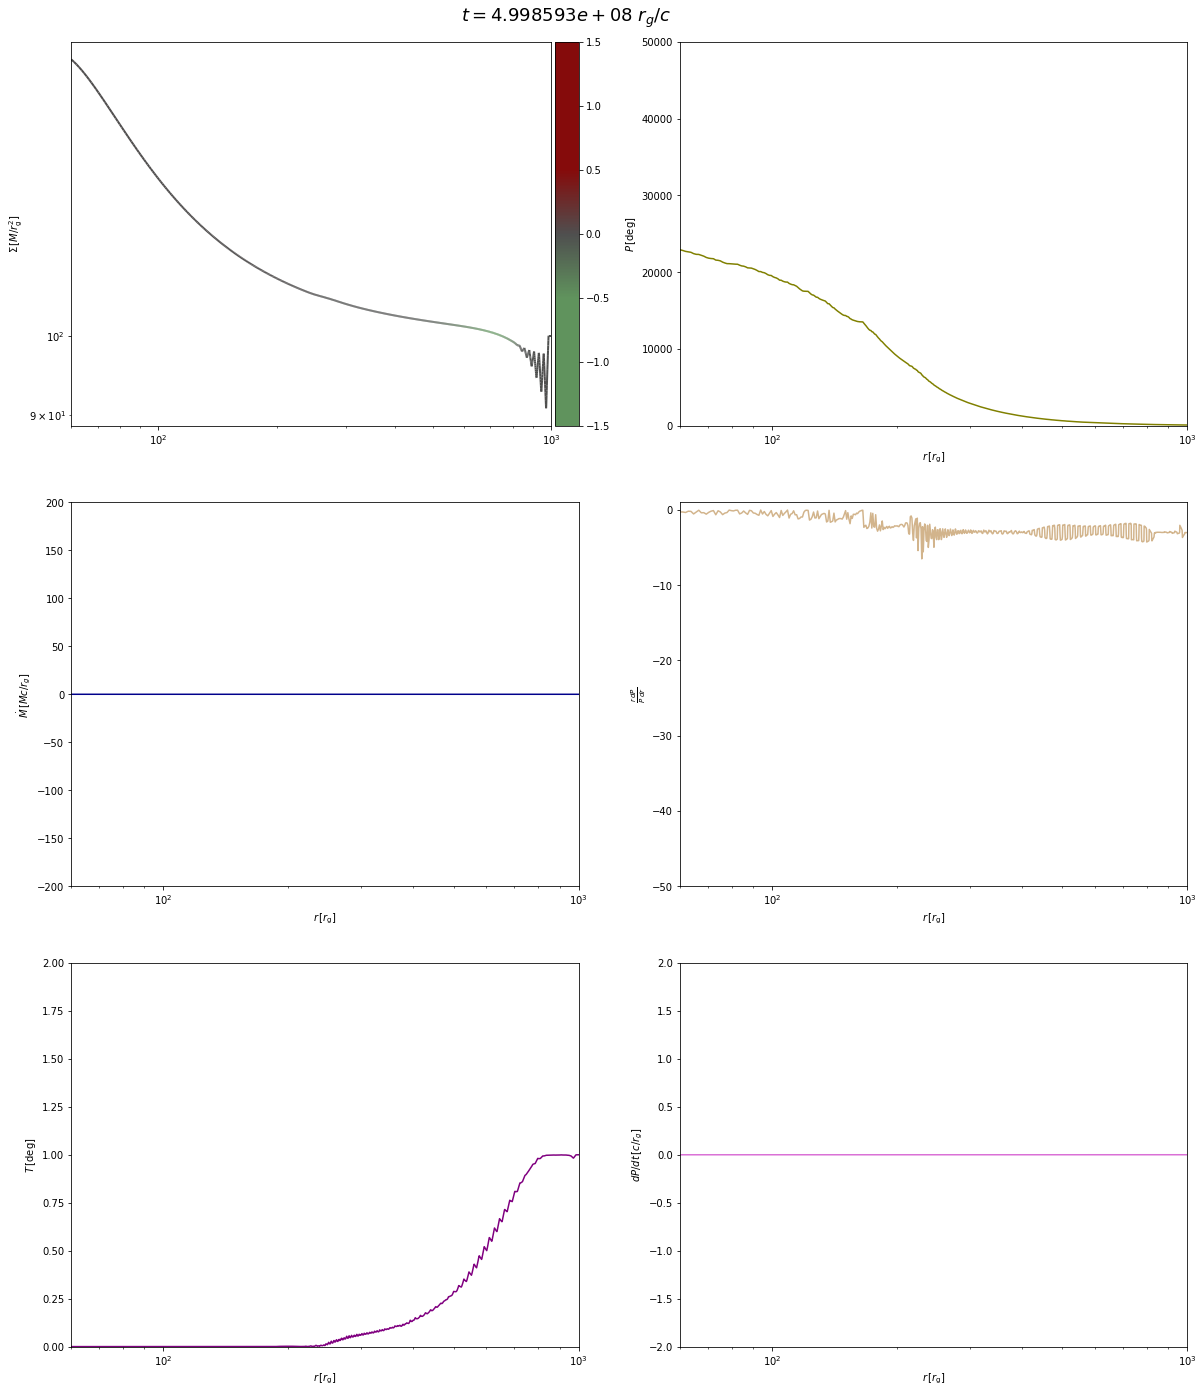

In [6]:
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_interface(table,ind):
    plot_r = table["r"][:,ind]
    plot_d = table["sigma"][:,ind]
    plot_t = table["tilt"][:,ind]
    plot_s = table["s"][:,ind]
    plot_p = table["prec"][:,ind]
    plot_rdpdr = table["rdpdr"][:,ind]/plot_p
    plot_dpdt  = table["dpdt"][:,ind]
    plot_mdot  = table["mdot"][:,ind]
    
    time = np.average(table["t"][:,ind])

    rmin = np.min(plot_r)
    rmax = np.max(plot_r)
    
    fig, ax = plt.subplots(3,2,figsize=(20,24))

    points = np.array([plot_r, plot_d]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap=cm,
        norm=plt.Normalize(-1.5,1.5))
    lc.set_array(plot_s)
    lc.set_linewidth(2)
    
    plot = ax[0][0].add_collection(lc)
    ax[0][0].set_ylabel(r'$\Sigma\,[M/r_{\rm g}^2]$')
    ax[0][0].set_xlim(rmin,rmax)
    #ax[0][0].set_ylim(0,8e4)
    ax[0][0].set_xscale('log')
    ax[0][0].set_yscale('log')
    divider = make_axes_locatable(ax[0][0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot, cax=cax, orientation='vertical')
    
    ax[1][0].plot(plot_r,plot_mdot,color='darkblue')
    ax[1][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[1][0].set_ylabel(r'$\dot{M}\,[Mc/r_g]$')
    ax[1][0].set_ylim(-2e2,2e2)
    ax[1][0].set_xlim(rmin,rmax)
    ax[1][0].set_xscale('log')

    ax[2][0].plot(plot_r,plot_t,color='purple')
    ax[2][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][0].set_ylabel(r'$T\,[{\rm deg}]$')
    ax[2][0].set_ylim(0,2)
    ax[2][0].set_xlim(rmin,rmax)
    ax[2][0].set_xscale('log')

    ax[0][1].plot(plot_r,plot_p,color='olive')
    ax[0][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[0][1].set_ylabel(r'$P\,[{\rm deg}]$')
    ax[0][1].set_ylim(0,50000)
    ax[0][1].set_xlim(rmin,rmax)
    ax[0][1].set_xscale('log')
    #ax[0][1].set_yscale('log')

    ax[1][1].plot(plot_r,plot_rdpdr,color='tan')
    ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[1][1].set_ylabel(r'$\frac{r}{P}\frac{dP}{dr}$')
    ax[1][1].set_ylim(-50,1)
    ax[1][1].set_xlim(rmin,rmax)
    ax[1][1].set_xscale('log')

    ax[2][1].plot(plot_r,plot_dpdt,color='orchid')
    ax[2][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][1].set_ylabel(r'$dP/dt\,[c/r_g]$')
    ax[2][1].set_ylim(-2,2)
    ax[2][1].set_xlim(rmin,rmax)
    ax[2][1].set_xscale('log')
    
    #title = "t = %s"
    plt.title(r"$t = %e \,\,r_g/c$" % time,fontsize=18,pad=20)
    
    return fig
#fig = plot_interface(full_data,5000)
#plt.savefig('alignment_front_early.png')
#plt.show()
fig = plot_interface(full_data[0],-1)
plt.show()

### Lets make a plotting interface, which we can test for one of our tables. 

### Lets say we want to plot the quantities as a movie. We do this by making .png frames of each snapshot and then combining them into a movie using ffmpeg. 
### We iterate through each table that we have generated, then we use our plotting interface to get the figure from matplotlib that we want. 
### Then, we just save this as a series of .png files. From command line, we can do this using ffmpeg, for instance:
### "ffmpeg -r 5 -s 1920x1080 -i tilt_%03d.png test.mp4"
### -r sets the frames per second; -s sets the resolution; -i sets the files we want to read, where %03d indicates we're look for integers of length 3, i.e. 1 --> 001, 10 --> 010, etc; and then test.mp4 is just the name of our file.
### We can do this interactively in jupyter notebook (auto = 1) and remove the .png files afterwards, if we want, as well (clean = 1)

In [14]:
print range(0,10000,50)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000, 6050, 6100, 6150, 6200, 6250, 6300, 6350, 6400, 6450, 6500, 6550, 6600, 6650, 6700, 6750, 6800, 6850, 6900, 6950, 7000, 7050, 7100, 7150, 7200, 7250, 7300, 7350, 7400, 7450, 7500, 7550, 7600, 7650, 7700, 7750, 7800, 7850, 7900, 7950, 8000, 8050, 8100, 8150, 8200, 8250, 8300, 8350, 8400, 8450, 85

In [34]:
##################
## User Parameters

# Prefix will be appended with 001.png,002.png,003.png,...
path_prefix = "../plots/doesntmatter_"

# Movie path will be appended with .mp4
movie_path = "../plots/outer_tilt45_convergence"

# Make a movie if auto = 1
auto = 1

# Remove all files starting with path_prefix if clean = 1
clean = 0

##
##################

## Call plotting interface to build frames
png_names = []
frame_no = 0
for i in range(0,1000,2):
    suffix = str(frame_no).zfill(4)
    fig = plot_interface_multi(full_data[1:],i)
    fig.savefig(path_prefix+suffix)
    png_names.append(path_prefix+suffix + ".png")
    plt.clf()
    frame_no += 1

# Use ffmpeg from command line interface
if (auto):
    !ffmpeg -r 3 -s 1920x1080 -i {path_prefix}%04d.png {movie_path}.mp4

# You can just delete the .png files if you already made your movie
if (clean):
    for name in png_names:
        !rm $name

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  
/home/nkaaz/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>

<Figure size 1440x1728 with 0 Axes>